In [48]:
import numpy as np
import pandas as pd
import re
import math
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split #used for splitting data into train and test
from sklearn import metrics  #for scoring performance
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from statistics import mean
import seaborn as sn


vectorizer =TfidfVectorizer()
kfold = KFold(n_splits=20, shuffle=True, random_state=0)
symboles = [',','.','!','؟','(',')','<','>']   

def normalize(text):
    text = re.sub(r'[^\u0621-\u06CC\s]+', '', text)
    words = text.split(" ")
    words_without_stopwords = [word for word in words if not word in symboles]
    return " ".join(words_without_stopwords)


def train_by_cross_validation(X,y):
    X=vectorizer.fit_transform(X)
    clf = LogisticRegression()
    scores = []
    for train_index, test_index in kfold.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)
        scores.append(score)
    return clf,score

def prediction(clf,sentece):
    sentence=normalize(sentece)
    sentence = vectorizer.transform([sentece])
    formality = clf.predict(sentence)[0]
    print(formality)


df = pd.read_csv("classification.csv")
train_text, test_text, train_labels, test_labels = train_test_split(df['sentence'], df['label'], test_size=0.2, random_state=42)
train_text = train_text.apply(lambda x: normalize(x))
sentences=np.array(train_text)
label=np.array(train_labels)
clf,scores=train_by_cross_validation(sentences,label)
mean_accuracy = np.mean(scores)
print("Mean accuracy:", mean_accuracy)
new_sentence=input()
prediction(clf,new_sentence)

Mean accuracy: 0.88875
من خوبم
محاوره


In [49]:
def CM_drawer(array):
  df_cm = pd.DataFrame(array)
  sn.heatmap(df_cm, annot=True, cmap="YlGnBu")

              precision    recall  f1-score   support

        رسمی       0.88      0.90      0.89      2043
      محاوره       0.89      0.87      0.88      1957

    accuracy                           0.89      4000
   macro avg       0.89      0.89      0.89      4000
weighted avg       0.89      0.89      0.89      4000

[[1839  204]
 [ 245 1712]]


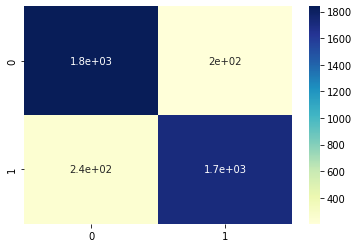

In [53]:
test_text = test_text.apply(lambda x: normalize(x))
test_text = vectorizer.transform(test_text)
print(classification_report(test_labels, clf.predict(test_text)))
cm = confusion_matrix(test_labels, clf.predict(test_text))
print(cm)
CM_drawer(cm)

In [4]:
from google.colab import drive

In [5]:
drive.mount("/content/drive/")

Mounted at /content/drive/


In [6]:
%cd drive/MyDrive

/content/drive/MyDrive


In [32]:
model={"clf":clf ,"tfidf":vectorizer}

In [33]:
import pickle 

with open('logreg_trained_model12.pickle', 'wb') as handle:
    pickle.dump(model, handle)